<a href="https://colab.research.google.com/github/mikealfaro24/Data201_project1/blob/main/Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://data.montgomerycountymd.gov/resource/icn6-v9z3.csv"
crimedata = pd.read_csv(url)
# Introducing data


In [ ]:
print(crimedata.head())


   incident_id  offence_code  case_number                     date  \
0    201452140          1205    230065034  2023-11-08T03:20:12.000   
1    201452138          2203    230065033  2023-11-08T02:43:30.000   
2    201452136          1305    230065028  2023-11-08T01:08:41.000   
3    201452119          2601    230065015  2023-11-07T21:15:52.000   
4    201452132          1304    230065019  2023-11-07T21:06:46.000   

                start_date                 end_date nibrs_code  victims  \
0  2023-11-08T03:20:00.000                      NaN        120        1   
1  2023-11-08T02:30:00.000  2023-11-08T02:42:00.000        220        1   
2  2023-11-08T00:08:00.000  2023-11-08T01:50:00.000        13A        1   
3  2023-11-07T21:15:00.000                      NaN        26A        1   
4  2023-11-07T21:06:00.000  2023-11-08T00:00:00.000        13A        5   

               crimename1                               crimename2  ...  pra  \
0  Crime Against Property                       

In [ ]:
coltodel = ['incident_id', 'offence_code' , 'case_number', 'date', 'end_date', 'district', 'location', 'address_street', 'state', 'beat', 'sector', 'nibrs_code', 'pra', 'address_number', 'street_prefix_dir', 'street_suffix_dir', 'street_type', 'geolocation']

crimedata.drop(columns= coltodel, inplace=True)

crimedata.columns = ['Date', 'Victims', 'CrimeType', 'CrimenName1', 'CrimeName2', 'City', 'Zipcode', 'PoliceDept', 'PlaceDesctiption', 'Lat', 'Long', 'PoliceDistrict']
# Renaming columns


In [ ]:
crimedata['Date'] = pd.to_datetime(crimedata['Date'])
crimedata['Time'] = crimedata['Date'].dt.strftime('%H:%M:%S')
crimedata['Date'] = crimedata['Date'].dt.date

print(crimedata)

# fixing time/date column

           Date  Victims               CrimeType  \
0    2023-11-08        1  Crime Against Property   
1    2023-11-08        1  Crime Against Property   
2    2023-11-08        1    Crime Against Person   
3    2023-11-07        1  Crime Against Property   
4    2023-11-07        5    Crime Against Person   
..          ...      ...                     ...   
995  2023-10-27        1  Crime Against Property   
996  2023-10-27        1  Crime Against Property   
997  2023-10-27        1  Crime Against Property   
998  2023-10-27        1  Crime Against Property   
999  2023-10-27        2    Crime Against Person   

                                  CrimenName1  \
0                                     Robbery   
1              Burglary/Breaking and Entering   
2                          Aggravated Assault   
3     False Pretenses/Swindle/Confidence Game   
4                          Aggravated Assault   
..                                        ...   
995                       Motor 

In [ ]:
print(crimedata.isna().sum())
# shows how man NA are in each column

Date                0
Victims             0
CrimeType           0
CrimenName1         0
CrimeName2          0
City                0
Zipcode             0
PoliceDept          0
PlaceDesctiption    0
Lat                 0
Long                0
PoliceDistrict      0
Time                0
dtype: int64


In [ ]:
crimedata['CrimeType'].value_counts()
# nummber of cases for each crime type

Crime Against Property    777
Crime Against Person      152
Crime Against Society      71
Name: CrimeType, dtype: int64

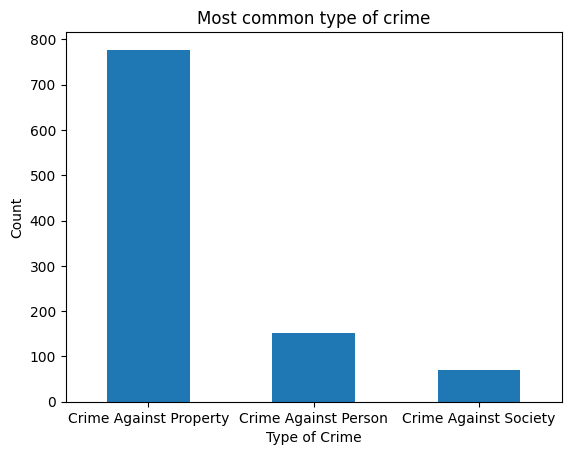

In [ ]:
ctcounts = crimedata['CrimeType'].value_counts()
ctcounts.plot(kind='bar')
plt.xlabel('Type of Crime')
plt.ylabel('Count')
plt.title('Most common type of crime')
plt.xticks(rotation=0)
plt.show()

In [ ]:
crimedata['City'].value_counts()
# number of cases for each town

SILVER SPRING         373
GAITHERSBURG          155
ROCKVILLE             137
GERMANTOWN             86
TAKOMA PARK            60
BETHESDA               51
MONTGOMERY VILLAGE     29
CLARKSBURG             14
POTOMAC                14
CHEVY CHASE            14
OLNEY                  13
BURTONSVILLE           13
KENSINGTON             12
DAMASCUS               10
DERWOOD                 9
SANDY SPRING            3
DICKERSON               3
POOLESVILLE             2
BELTSVILLE              1
BOYDS                   1
Name: City, dtype: int64

In [ ]:
city_counts = crimedata['City'].value_counts()
city_table = pd.DataFrame(city_counts).reset_index()
city_table.columns = ['City', 'Count']

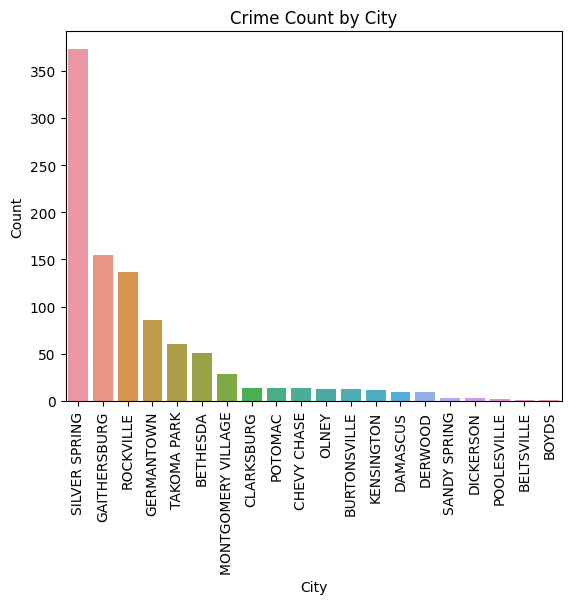

In [ ]:
sns.barplot(x='City', y='Count', data=city_table)
plt.title('Crime Count by City')
plt.xticks(rotation=90)
plt.show()

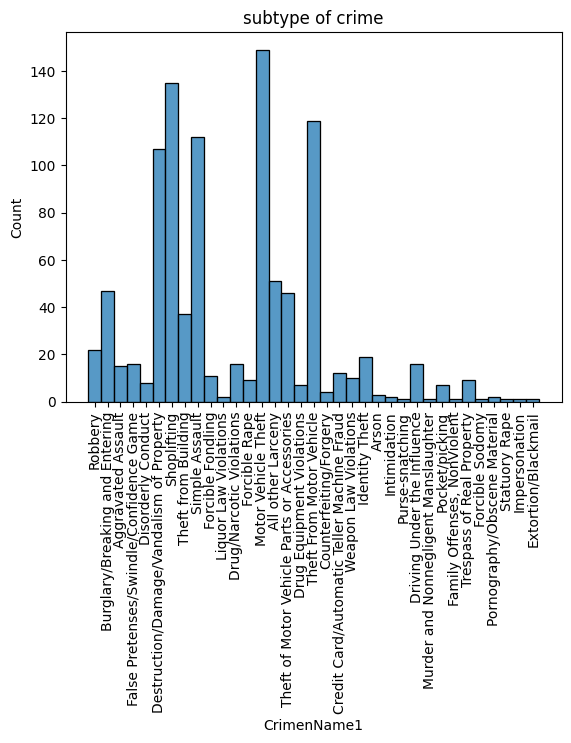

In [ ]:
# not a very successful graph
sns.histplot(crimedata['CrimenName1'])
plt.title('subtype of crime')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Bootstrapping with # of victims columns

# data
crimedata_array = np.array(crimedata['Victims'])

# Number of bootstrap samples
num_bootstrap_samples = 100

bootstrap_means = []
for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(crimedata_array, size=len(crimedata_array), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Calculating 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Print the results
print(f"Bootstrap Mean: {np.mean(bootstrap_means)}")
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


Bootstrap Mean: 1.04558
95% Confidence Interval: (1.029, 1.065)
